<a href="https://colab.research.google.com/github/sgr1118/FD/blob/main/FD21_Deep_Learning_FrameWork(220810).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21-2. 신경망 구성 (1) 개요

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 모델에 맞게 데이터 가공
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_reshaped = x_train_norm.reshape(-1, x_train_norm.shape[1]*x_train_norm.shape[2])
x_test_reshaped = x_test_norm.reshape(-1, x_test_norm.shape[1]*x_test_norm.shape[2])

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# parameters / weights

# 입력층 데이터의 shape
print(x_train_reshaped.shape)

# 테스트를 위해 x_train.reshaped의 앞 5개 데이터 불러오기
X = x_train_reshaped[:5]
print(X.shape)

(60000, 784)
(5, 784)


In [ ]:
weight_init_std = 0.1
input_size = 784 # 컬럼 수
hidden_size = 50

# 인접 레이어간 관계를 나타내는 파라미터 W를 생성하고 random 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
# 바이어스 파라미터 b를 생성하고 Zero로 초기화
b1 = np.zeros(hidden_size)

a1 = np.dot(X, W1) + b1 # 은닉층 출력

print(W1.shape)
print(b1.shape)
print(a1.shape)

(784, 50)
(50,)
(5, 50)


In [ ]:
# 첫 번째 데이터의 은닉층 출력을 확인해 봅시다. 50dim1[0]

array([ 0.71593259,  0.36165745, -0.6022824 , -1.08717063, -0.87900251,
       -1.4352597 , -0.6899181 , -0.06384669, -0.42505382, -0.59980032,
        1.39327623, -0.08493497,  1.13901399, -0.9691237 ,  0.63704976,
        0.68164625,  0.57447058, -0.34879076, -0.33299946,  0.47630513,
       -0.24836894,  0.2870897 ,  0.83142802, -1.12911072, -2.24378391,
       -1.25083563,  0.86241394, -0.74944109,  1.47466018,  0.53391437,
        1.01279016,  0.38113678,  0.08446361, -1.37978144, -0.95033232,
        0.39673551, -0.16120565, -0.24271664, -0.58293683, -0.45955198,
        1.44019381,  0.62179262, -0.50415886,  0.74654588,  0.69345684,
        2.07924036,  0.33752663,  1.66635888,  0.3486716 ,  0.36009562])

# 21-3. 신경망 구성 (2) 활성화 함수와 손실 함수


In [ ]:
# 활성화 함수 : Sigmoid

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

z1 = sigmoid(a1)
print(z1[0]) # sigmoid의 출력은 모든 element가 0에서 1사이

[0.67171072 0.5894416  0.35382169 0.25215144 0.29338453 0.19228049
 0.33405129 0.48404375 0.39530805 0.35438938 0.80111476 0.47877901
 0.75749856 0.2750552  0.65408625 0.66410602 0.6397941  0.41367569
 0.41751099 0.61687501 0.438225   0.57128349 0.69665679 0.24432525
 0.095887   0.22255552 0.70316475 0.3209431  0.81376468 0.63039561
 0.73356583 0.59414725 0.52110336 0.2010441  0.27881799 0.59790308
 0.45978564 0.43961699 0.35825711 0.38709211 0.80848466 0.65062614
 0.37656382 0.6784256  0.66673548 0.88886902 0.58358959 0.84108976
 0.58629541 0.58906358]


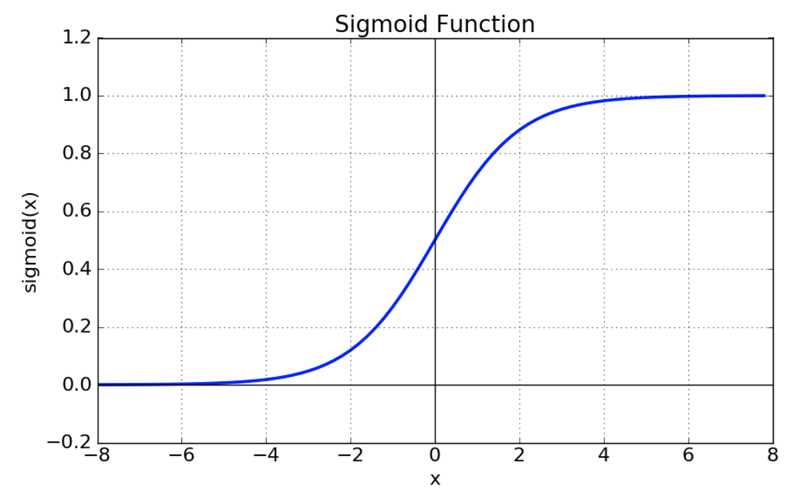

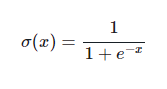

In [ ]:
# Tanh

# tanh 함수는 함수의 중심값을 0으로 옮겨 sigmoid의 최적화 과정이 느려지는 문제 해결
# vanishing gradient 문제 존재.

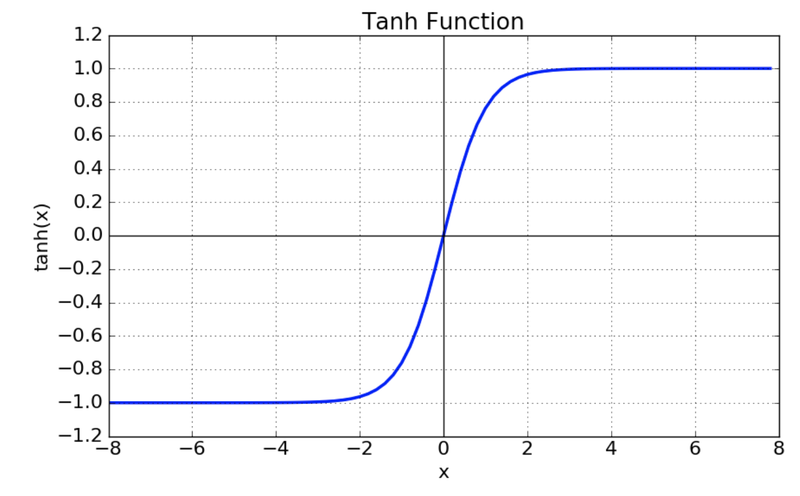

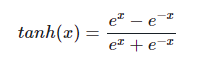

In [ ]:
# Relu

# sigmoid, tanh 함수에 비해 학습이 빠름.
# 연산 비용이 크지 않고, 구현이 매우 간단하다.

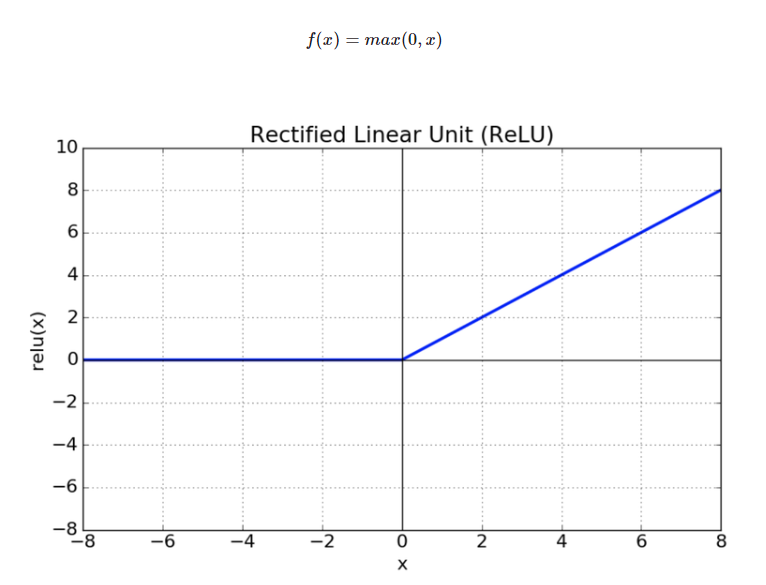

In [ ]:
# 단일 레이어 구현 함수
def affine_layer_forward(X, W, b):
  y = np.dot(X, W) + b
  cache = (X, W, b)
  return y, cache

input_size = 784
hidden_size = 50
output_size = 10

W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)
# z1이 다시 두번째 레이어의 입력이 됩니다.

print(a2[0]) # 최종 출력이 output_size만큼의 벡터가 되었습니다.

[ 0.01275437  0.2306378   0.26132002 -0.20426603 -0.25224725  0.04468638
  0.02716508  0.05130301  0.49755717 -0.16397032]


In [ ]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis = 0)
    y = np.exp(x) / np.sum(np.exp(x), axis = 0)
    return y.T

  x = x - np.max(x) # 오버플로 대책
  return np.exp(x) / np.sum(np.exp(x))

y_hat = softmax(a2)
y_hat[0] # 10개의 숫자 중 하나일 확률이됨.

array([0.0939331 , 0.11680038, 0.12043962, 0.07560803, 0.07206592,
       0.09698098, 0.09529655, 0.09762479, 0.15253372, 0.07871692])

In [ ]:
# 손실함수

# MSE

# Cross Entropy
# Cross Entropy는 두 확률분포 사이의 유사도가 클수록 작아지는 값입니다.

# 정답 라벨을 one-hot 인코딩하는 함수
def _change_one_hot_label(X, num_catrgory):
  T = np.zeros((X.size, num_catrgory))
  for idx, row in enumerate(T):
    row[X[idx]] = 1

  return T

Y_digit = y_train[:5]
t = _change_one_hot_label(Y_digit, 10)
t # 정답 라벨의 one-hot 인코딩

print(y_hat[0])
print(t[0])

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스도 반환
  if t.size == y.size:
    t = t.argmax(axis=1)

  batch_size = y.shape[0]
  return - np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

Loss = cross_entropy_error(y_hat, t)
Loss

[0.0939331  0.11680038 0.12043962 0.07560803 0.07206592 0.09698098
 0.09529655 0.09762479 0.15253372 0.07871692]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


2.3277910864476277

# 21-4. 경사하강법

- 모델이 데이터를 잘 표현할 수 있도록 기울기를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

In [ ]:
# 경사하강법 구현
batch_num = y_hat.shape[0]
dy = (y_hat - t) / batch_num
dy # softmax값의 출력으로 Loss를 미분한 값

array([[ 0.01878662,  0.02336008,  0.02408792,  0.01512161,  0.01441318,
        -0.1806038 ,  0.01905931,  0.01952496,  0.03050674,  0.01574338],
       [-0.17585507,  0.02631393,  0.02060266,  0.01570837,  0.01504754,
         0.01813693,  0.01888028,  0.02010706,  0.02520532,  0.01585297],
       [ 0.02052301,  0.02355328,  0.02259951,  0.01495797, -0.18426958,
         0.02050905,  0.01622143,  0.02083841,  0.026466  ,  0.01860093],
       [ 0.02119677, -0.17890492,  0.02580043,  0.01611569,  0.01528883,
         0.01848521,  0.01907205,  0.01951672,  0.02809777,  0.01533146],
       [ 0.01687014,  0.02656796,  0.02175294,  0.01517281,  0.01617396,
         0.01899144,  0.01936998,  0.0182665 ,  0.02868113, -0.18184686]])

In [ ]:
dW2 = np.dot(z1.T, dy)
dW2

array([[-0.02565904, -0.04283636,  0.05960553,  0.03952742, -0.07793826,
        -0.08329025,  0.04737755,  0.05064418,  0.07196153, -0.0393923 ],
       [-0.0530608 , -0.04550428,  0.04179015,  0.02830151, -0.05844894,
         0.00335561,  0.0336392 ,  0.03610184,  0.04991329, -0.03608759],
       [-0.06909288, -0.07499096,  0.08398114,  0.05614644, -0.10944012,
        -0.07337339,  0.06706842,  0.07182756,  0.10087245, -0.05299866],
       [-0.0105314 , -0.07562032,  0.05873467,  0.03868776, -0.0843828 ,
        -0.06229646,  0.04611804,  0.04948658,  0.07011258, -0.03030867],
       [ 0.01123432, -0.00535992,  0.0794675 ,  0.05268283, -0.13431498,
        -0.11555907,  0.06334328,  0.06766767,  0.097335  , -0.11649663],
       [-0.06642645, -0.01119747,  0.06463554,  0.04341203, -0.07106132,
        -0.09963606,  0.05226711,  0.05567971,  0.07878435, -0.04645744],
       [ 0.00103653, -0.03836204,  0.03448181,  0.02307766, -0.03580059,
         0.00228604,  0.02785219,  0.02900602

In [ ]:
# 파라미터 기울기 얻기
dW2 = np.dot(z1.T, dy)
db2 = np.sum(dy, axis = 0)

# 시그모이드 grad 고려
def sigmoid_grad(x):
  return (1.0 - sigmoid(x)) * sigmoid(x)

dz1 = np.dot(dy, W2.T)
da1 = sigmoid_grad(a1) * dz1
dW1 = np.dot(X.T, da1)
db1 = np.sum(dz1, axis=0)

learning_rate = 0.1
def update_params(W1, b1, W2, b2, dW1,db1, dW2, db2, learning_rate):
  W1 = W1 - learning_rate*dW1
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dW2
  b2 = b2 - learning_rate*db2
  return W1, b1, W2, b2

# 21-5. 오차역전파법이란?

- MLP를 학습시키기 위한 일반적인 알고리즘 중 하나

- 출력층의 결과와 내가 뽑고자하는 target값과의 차이를 구한 뒤, 드 오차 값을 각 레이어들을 지나며 역전파 해가며 각 노드가 가지고 있는 변수들을 갱신해 나가는 방식

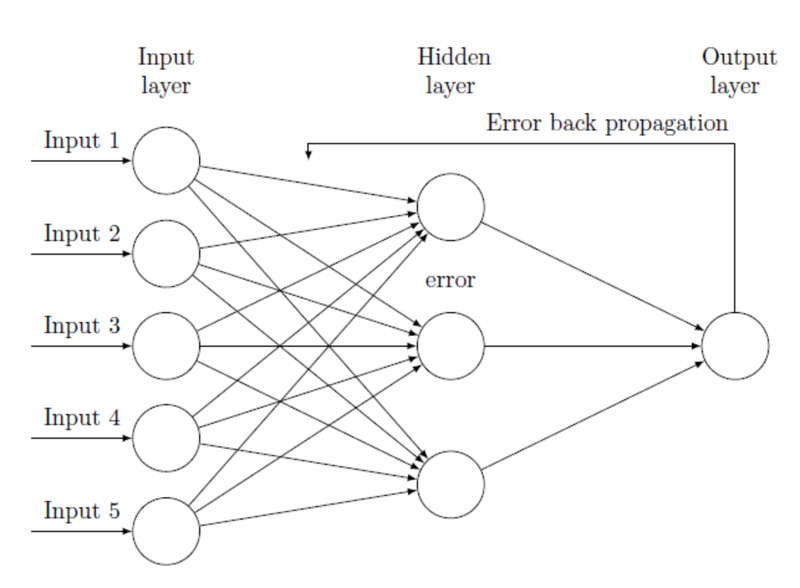

In [ ]:
# 오차역전파 function

def affine_layer_backward(dy, cache):
  X, W, b = cache
  dX = np.dot(dy, W.T)
  dW = np.dot(X.T, dy)
  db = np.sum(dy, axis = 0)
  return dX, dW, db

# 파라미터 초기화
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# Forward Propagation
a1, cache1 = affine_layer_forward(X, W1, b1)
z1 = sigmoid(a1)
a2, cache2 = affine_layer_forward(z1, W2, b2)

# 추론과 오차(Loss) 계산
y_hat = softmax(a2)
t = _change_one_hot_label(Y_digit, 10)   # 정답 One-hot 인코딩
Loss = cross_entropy_error(y_hat, t)

print(y_hat)
print(t)
print('Loss: ', Loss)

dy = (y_hat - t) / X.shape[0]
dz1, dW2, db2 = affine_layer_backward(dy, cache2)
da1 = sigmoid_grad(a1) * dz1
dX, dW1, db1 = affine_layer_backward(da1, cache1)

# 경사하강법을 통한 파라미터 업데이트
learning_rate = 0.1
W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

[[0.1361069  0.07931926 0.06302834 0.07658378 0.08447377 0.12464527
  0.16420881 0.11187647 0.07477865 0.08497876]
 [0.13333873 0.08780749 0.06400401 0.08309399 0.09844724 0.10993619
  0.155515   0.09297034 0.07941641 0.0954706 ]
 [0.12221357 0.08593059 0.0862019  0.07673757 0.07766941 0.09469381
  0.18756248 0.10827855 0.08714261 0.07356952]
 [0.13899715 0.0918601  0.08597374 0.07993966 0.08679102 0.09113302
  0.18277068 0.08396267 0.08604443 0.07252753]
 [0.13419757 0.0749605  0.08211546 0.08178403 0.09545664 0.10055926
  0.17477404 0.10021771 0.07440345 0.08153134]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.309339220743508


# 21-6. 모델 학습 Step-by-Step

In [ ]:
# 파라미터 업데이트 과정

# 싱글레이어 만들기
W1 = weight_init_std * np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = weight_init_std * np.random.randn(hidden_size, output_size)
b2 = np.zeros(output_size)

# 순전파 > 역전파 진행
def train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=False):
    a1, cache1 = affine_layer_forward(X, W1, b1)
    z1 = sigmoid(a1)
    a2, cache2 = affine_layer_forward(z1, W2, b2)
    # 추론과 오차 계산
    y_hat = softmax(a2)
    t = _change_one_hot_label(Y, 10)
    Loss = cross_entropy_error(y_hat, t)

    if verbose:
        print('---------')
        print(y_hat)
        print(t)
        print('Loss: ', Loss)
        
    dy = (y_hat - t) / X.shape[0]
    dz1, dW2, db2 = affine_layer_backward(dy, cache2)
    da1 = sigmoid_grad(a1) * dz1
    dX, dW1, db1 = affine_layer_backward(da1, cache1)
    # 파라미터 업데이트
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2, Loss

In [ ]:
X = x_train_reshaped[:5]
Y = y_train[:5]

# train_step을 다섯 번 반복
for i in range(5):
  W1, b1, W2, b2, _ = train_step(X, Y, W1, b1, W2, b2, learning_rate=0.1, verbose=True)

---------
[[0.04527727 0.12668039 0.14194936 0.13397088 0.09346481 0.13855948
  0.12267856 0.06076728 0.06158761 0.07506437]
 [0.06427318 0.12149956 0.11911604 0.14950331 0.08706677 0.13962626
  0.12659998 0.05813087 0.06167513 0.0725089 ]
 [0.05036629 0.12424384 0.09654394 0.14576281 0.0802005  0.15820844
  0.1233396  0.07443277 0.06900649 0.07789532]
 [0.04221335 0.13983469 0.11769864 0.13123671 0.06935016 0.14643283
  0.13370028 0.06940501 0.06585608 0.08427226]
 [0.04230527 0.11943885 0.15876507 0.12846538 0.07101195 0.14279301
  0.15973187 0.05102896 0.06118355 0.0652761 ]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Loss:  2.3881435346898936
---------
[[0.05762957 0.14205648 0.11705168 0.10855756 0.11001451 0.15963654
  0.10107377 0.05606551 0.05655476 0.09135962]
 [0.08339388 0.13432671 0.09909898 0.12291756 0.10111975 0.1547977
  0.10514583 0.05420765 0.0574

# 21-7. 추론 과정 구현과 정확도(Accuracy) 계산

In [ ]:
def predict(W1, b1, W2, b2, X):
  a1 = np.dot(X, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  y = softmax(a2)

  return y

# X = x_train[:100] 에 대해 모델 추론을 시도합니다. 
X = x_train_reshaped[:100]
Y = y_test[:100]
result = predict(W1, b1, W2, b2, X)
result[0]

array([0.10635199, 0.1615279 , 0.06128878, 0.05451619, 0.14873498,
       0.20593045, 0.05315435, 0.03716978, 0.0368618 , 0.13446378])

In [ ]:
def accuracy(W1, b1, W2, b2, x, y):
    y_hat = predict(W1, b1, W2, b2, x)
    y_hat = np.argmax(y_hat, axis=1)

    accuracy = np.sum(y_hat == y) / float(x.shape[0])
    return accuracy

acc = accuracy(W1, b1, W2, b2, X, Y)

t = _change_one_hot_label(Y, 10)
print(result[0])
print(t[0])
print(acc)

[0.10635199 0.1615279  0.06128878 0.05451619 0.14873498 0.20593045
 0.05315435 0.03716978 0.0368618  0.13446378]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
0.09


# 21-8. 전체 학습 사이클 수행

In [ ]:
# 파라미터 초기화 함수

def init_params(input_size, hidden_size, output_size, weight_init_std=0.01):
  W1 = weight_init_std * np.random.randn(input_size, hidden_size)
  b1 = np.zeros(hidden_size)
  W2 = weight_init_std * np.random.randn(hidden_size, output_size)
  b2 = np.zeros(output_size)

  print(W1.shape)
  print(b1.shape)
  print(W2.shape)
  print(b2.shape)
    
  return W1, b1, W2, b2

# 학습 진행
iters_num = 50000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에포크 당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

W1, b1, W2, b2 = init_params(784, 50, 10)

for i in range(iters_num):
  # 미니배치 획득
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train_reshaped[batch_mask]
  y_batch = y_train[batch_mask]

  W1, b1, W2, b2, Loss = train_step(x_batch, y_batch, W1, b1, W2, b2, learning_rate=0.1, verbose=False)

  # 학습 경과 기록
  train_loss_list.append(Loss)

  # 1에폭당 정확도 계산
  if i % iter_per_epoch == 0:
    print('Loss: ', Loss)
    train_acc = accuracy(W1, b1, W2, b2, x_train_reshaped, y_train)
    test_acc = accuracy(W1, b1, W2, b2, x_test_reshaped, y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

(784, 50)
(50,)
(50, 10)
(10,)
Loss:  2.2992134359716414
train acc, test acc | 0.11236666666666667, 0.1135
Loss:  0.9007797832361656
train acc, test acc | 0.7956666666666666, 0.7999
Loss:  0.6050788848065332
train acc, test acc | 0.8761, 0.8798
Loss:  0.41419360796238097
train acc, test acc | 0.8974166666666666, 0.8989
Loss:  0.2907712537106523
train acc, test acc | 0.9075, 0.9091
Loss:  0.2624392009151632
train acc, test acc | 0.91415, 0.9168
Loss:  0.4050513875554187
train acc, test acc | 0.91815, 0.9182
Loss:  0.3906296363617214
train acc, test acc | 0.9235166666666667, 0.9256
Loss:  0.18727818142011188
train acc, test acc | 0.9268, 0.9288
Loss:  0.27837517058218614
train acc, test acc | 0.9307, 0.9325
Loss:  0.21526354259753666
train acc, test acc | 0.9331166666666667, 0.9343
Loss:  0.23726827162624345
train acc, test acc | 0.93595, 0.9375
Loss:  0.1952942445748846
train acc, test acc | 0.9376666666666666, 0.9388
Loss:  0.2265670208410072
train acc, test acc | 0.9401166666666667, 0

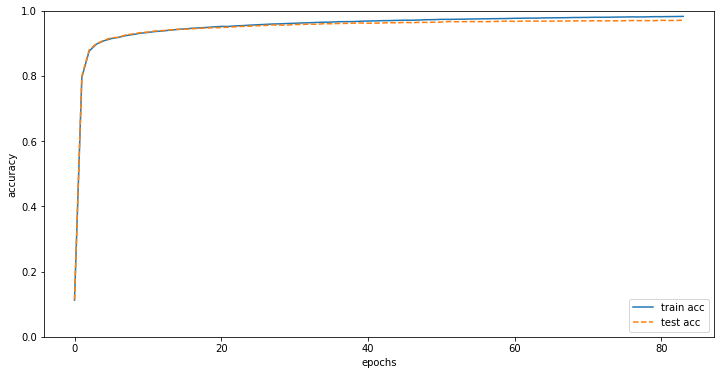

In [ ]:
#Accuracy, Loss 변화 시각화

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 

# Accuracy 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

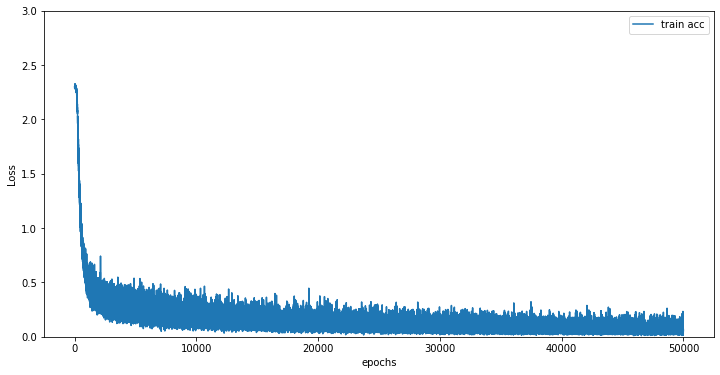

In [ ]:
# Loss 그래프 그리기
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.ylim(0, 3.0)
plt.legend(loc='best')
plt.show()